<a href="https://colab.research.google.com/github/GerardoMunoz/ML_2025/blob/main/Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entropy and cross entropy

## Entropy definition

$$
H(X)= - \sum_{x \in X}  p(x) \log p(x)
$$

This operation rewards the sparcity of data. That is, if there are more probabilities close to zero or that are zero, the entropy is lower.

Remember that $$\lim_{p(x) \to 0} p(x) \log p(x) = 0$$

## Introductory example
In the following table, we can see the  grade of some students and their preferred career.


| Math (Ma)  | Science (Sc) | English (En) | Preferred career (Pc) |
|-------|---------|---------|-----------------|
| Good (G)  | Good (G)  | Regular (R)  | Engineering (E) |
| Regular (R)  | Good (G)  | Bad (B)  | Medicine (M) |
| Bad (B)  | Regular (R)  | Good (G)  | Arts (A) |
| Good (G)  | Regular (R)  | Good (G)  | Engineering (E) |
| Regular (R)  | Bad (B)  | Regular (R)  | Arts (A) |
| Good (G)  | Good (G)  | Good (G)  | Engineering (E) |
| Bad (B)  | Good (G)  | Regular (R)  | Medicine (M) |
| Regular (R)  | Regular (R)  | Regular (R)  | Medicine (M) |
| Good (G)  | Bad (B)  | Good (G)  | Arts (A) |
| Bad (B)  | Bad (B)  | Bad (B)  | Arts (A) |


Now we can calculate the probability of the preferred career:

$$
p(E)=\frac{3}{10}, \,  \ p(M)=\frac{3}{10}, \, \ p(A)=\frac{4}{10}.
$$

With those probabilities we can estimate the Entropy

$$
H(Pc) = p(E)\log p(E) + p(M)\log p(M) + p(A)\log p(A) = 1.57
$$

## Application in decision tree

The decision tree algorithm selects the variable that reduces Entropy the most. But first we must have to calculate the conditional probabilities for each feature:
### 1. **Math**

  1.1  **Math = Good**:
$$p_{EMaG}=p(E \mid Ma=G)=\frac{3}{4}$$
$$p_{MMaG}=p(M \mid Ma=G)=\frac{0}{4}$$
$$p_{AMaG}=p(A \mid Ma=G)=\frac{1}{4}$$

$$
H(Pc \mid Ma=G)= p_{EMaG}\log p_{EMaG} + p_{MMaG}\log p_{MMaG}\ + p_{AMaG}\log p_{AMaG} = 0.81
$$

  1.2 **Math = Regular**:
$$p_{EMaR}=p(E \mid Ma=R)=\frac{0}{3}$$
$$p_{MMaR}=p(M \mid Ma=R)=\frac{2}{3}$$
$$p_{AMaR}=p(A \mid Ma=R)=\frac{1}{3}$$

$$
H(Pc \mid Ma=R)= p_{EMaR}\log p_{EMaR} + p_{MMaR}\log p_{MMaR}\ + p_{AMaR}\log p_{AMaR} = 0.92
$$

  1.3 **Math = Bad**:
$$p_{EMaB}=p(E \mid Ma=B)=\frac{0}{3}$$
$$p_{MMaB}=p(M \mid Ma=B)=\frac{1}{3}$$
$$p_{AMaB}=p(A \mid Ma=B)=\frac{2}{3}$$

$$
H(Pc \mid Ma=B)= p_{EMaB}\log p_{EMaB} + p_{MMaB}\log p_{MMaB}\ + p_{AMaB}\log p_{AMaB} = 0.92
$$

  1.4 **Calculate Weighted Entropy for "Math"**
$$
  H(Ma)=p(Ma=G)\ H(Pc \mid Ma=G) + p(Ma=R)\ H(Pc \mid Ma=R) + p(Ma=B)\ H(Pc \mid Ma=B)=0.87
$$

$$
  H(Ma)=\frac{4}{10}0.81+\frac{3}{10}0.92+\frac{3}{10}0.92=0.83
$$
  1.5 **Calculate Information Gain**

$$
  IG_{Ma}= H(Pc) - H(Ma) = 1.57 - 0.84 =0.7
$$

### 2. **Science**
 IG_{Sc}= 0.7

### 3. **English**
 IG_{En}= 0.37

### 4. **First decision**

Math has the highest Information Gain (0.7), it becomes the first split in the decision tree.


### 5. **Build the Decision Tree**

Now, we recursively split based on the next highest IG in each subset.

5.1 First Split: Math
 * Math = Good → More likely Engineering
 * Math = Regular → Check Science
 * Math = Bad → Check English

5.2 Second Splits:
 * Science for Regular Math Students
 * English for Bad Math Students

This process continues until each leaf node has a pure class (one career) or further splits don’t add much value.

### 6. Implement in Python

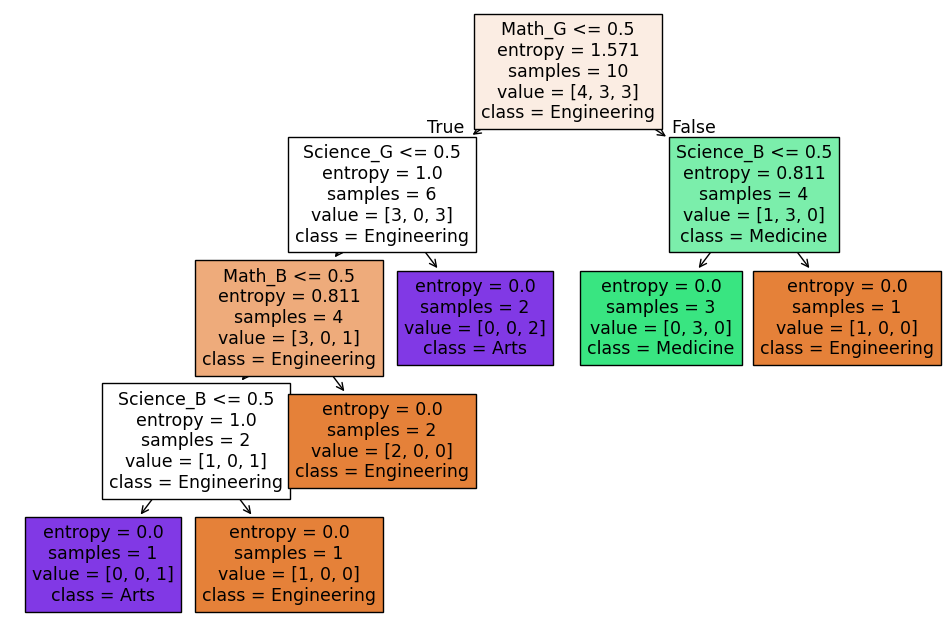

In [4]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt


data = [
    ["G", "G", "R", "E"],
    ["R", "G", "B", "M"],
    ["B", "R", "G", "A"],
    ["G", "R", "G", "E"],
    ["R", "B", "R", "A"],
    ["G", "G", "G", "E"],
    ["B", "G", "R", "M"],
    ["R", "R", "R", "M"],
    ["G", "B", "G", "A"],
    ["B", "B", "B", "A"]
]

features = ["Math", "Science", "English"]
target_col = 3

X_categorical = np.array([row[:3] for row in data])
y = np.array([row[3] for row in data])

# One-hot encode categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X_categorical)

# Train decision tree with categorical data
dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt.fit(X_encoded, y)

# Visualize tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=encoder.get_feature_names_out(features), class_names=["Engineering", "Medicine", "Arts"], filled=True)
plt.show()


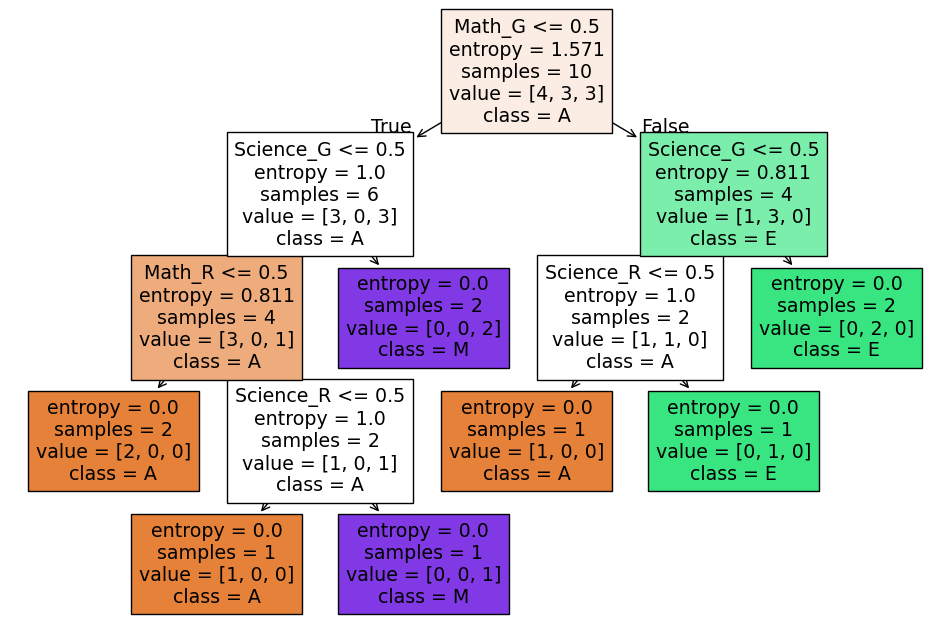

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define dataset
data = [
    ["G", "G", "R", "E"],
    ["R", "G", "B", "M"],
    ["B", "R", "G", "A"],
    ["G", "R", "G", "E"],
    ["R", "B", "R", "A"],
    ["G", "G", "G", "E"],
    ["B", "G", "R", "M"],
    ["R", "R", "R", "M"],
    ["G", "B", "G", "A"],
    ["B", "B", "B", "A"]
]

features = ["Math", "Science", "English"]
target_col = 3

X_categorical = np.array([row[:3] for row in data])
y = np.array([row[3] for row in data])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoiding redundancy
X_encoded = encoder.fit_transform(X_categorical)

# Train decision tree with categorical data
dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt.fit(X_encoded, y)

# Visualize tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=encoder.get_feature_names_out(features), class_names=np.unique(y), filled=True)
plt.show()



## To do
1. Make the Decision Tree algorithm for categories
2. Explore the scikit-learn algorithms
* DecisionTreeClassifier
* RandomForestClassifier
3. Presentation on Supervised Learning with which you have previous experience